## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA (Exploratory Data Analysis).


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import seaborn as sns
import requests
from src.config import WEATHER_API_KEY
import json
from calendar import monthrange

In [2]:
warnings.filterwarnings('ignore')

In [3]:
fn_flight = '../data/flight_data.csv'
fn_passenger = '../data/passengers_sample.csv'
fn_fuel = '../data/fuel_consumption.csv'

In [4]:
flight_df = pd.read_csv(fn_flight)
passenger_df = pd.read_csv(fn_passenger)
fuel_df = pd.read_csv(fn_fuel)

In [108]:
flight_df.head(500)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,row,month
0,2018-01-01,UA,UA_CODESHARE,UA,3542,YX,N637RW,3542,13495,MSY,...,0.0,0.0,0.0,122.0,NaN,NaN,NaN,NaN,150,01
1,2018-01-01,UA,UA_CODESHARE,UA,3725,YX,N861RW,3725,14869,SLC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300,01
2,2018-01-01,AA,AA,AA,1675,AA,N604AW,1675,11298,DFW,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,450,01
3,2018-01-01,AA,AA,AA,1035,AA,N314PD,1035,14679,SAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600,01
4,2018-01-01,AA,AA,AA,1412,AA,N936NN,1412,13891,ONT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,750,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2018-01-04,AA,AA,AA,638,AA,N801AW,638,14122,PIT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74400,01
496,2018-01-04,AA,AA,AA,1033,AA,N989NN,1033,11298,DFW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74550,01
497,2018-01-04,AA,AA,AA,1442,AA,N966NN,1442,15016,STL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74700,01
498,2018-01-04,AA,AA,AA,1264,AA,N826NN,1264,13930,ORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74850,01


In [6]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106183 entries, 0 to 106182
Data columns (total 43 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fl_date              106183 non-null  object 
 1   mkt_unique_carrier   106183 non-null  object 
 2   branded_code_share   106183 non-null  object 
 3   mkt_carrier          106183 non-null  object 
 4   mkt_carrier_fl_num   106183 non-null  int64  
 5   op_unique_carrier    106183 non-null  object 
 6   tail_num             105844 non-null  object 
 7   op_carrier_fl_num    106183 non-null  int64  
 8   origin_airport_id    106183 non-null  int64  
 9   origin               106183 non-null  object 
 10  origin_city_name     106183 non-null  object 
 11  dest_airport_id      106183 non-null  int64  
 12  dest                 106183 non-null  object 
 13  dest_city_name       106183 non-null  object 
 14  crs_dep_time         106183 non-null  int64  
 15  dep_time         

In [7]:
# flight_df[flight_df.columns[flight_df.columns != 'object']]
num = flight_df.columns[flight_df.dtypes != 'object'].tolist()
flight_df['dep_delay'].describe()

count    104488.000000
mean         10.839532
std          49.058229
min        -147.000000
25%          -6.000000
50%          -2.000000
75%           7.000000
max        1788.000000
Name: dep_delay, dtype: float64

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [8]:
stats.shapiro(flight_df['dep_delay'].dropna())

ShapiroResult(statistic=0.3714328408241272, pvalue=0.0)

In [9]:
delays = flight_df['dep_delay'][flight_df['dep_delay'] > 0]
stats.shapiro(delays)

ShapiroResult(statistic=0.4934779405593872, pvalue=0.0)

In [10]:
stats.shapiro(np.log(delays))

ShapiroResult(statistic=0.9852893352508545, pvalue=0.0)

<AxesSubplot:xlabel='dep_delay', ylabel='Density'>

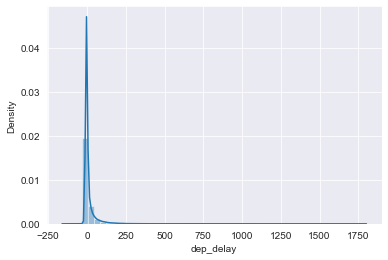

In [11]:
sns.distplot(flight_df['dep_delay'].dropna())

<AxesSubplot:xlabel='dep_delay', ylabel='Density'>

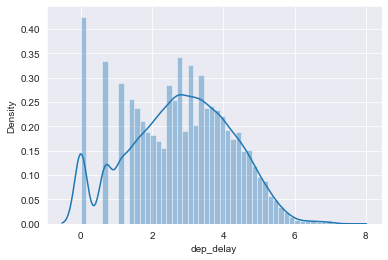

In [12]:
sns.distplot(np.log(delays))

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [13]:
flight_df['month'] = flight_df['fl_date'].str[5:-3]
flight_df[['month', 'dep_delay']].groupby(['month']).mean().sort_values('dep_delay')

,dep_delay
month,
10,6.859221
09,7.526791
03,8.714156
11,8.808516
04,8.903935
01,10.950055
12,11.634633
02,12.027834
05,12.089112


#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [251]:
# get all the cities
cities = flight_df['origin_city_name'].unique().tolist()

In [253]:
flight_df['fl_date'] = pd.to_datetime(flight_df['fl_date'])

In [325]:
date_before = pd.to_datetime('2018-02-01')
flight_df2018 = flight_df[flight_df['fl_date'] < date_before]
flight_df2018['origin_city_name'].unique()

array(['New Orleans, LA', 'Salt Lake City, UT', 'Dallas/Fort Worth, TX',
       'San Diego, CA', 'Ontario, CA', 'Chicago, IL', 'Jacksonville, FL',
       'Philadelphia, PA', 'Detroit, MI', 'Gainesville, FL',
       'Augusta, GA', 'New York, NY', 'Las Vegas, NV', 'Orlando, FL',
       'Alexandria, LA', 'Toledo, OH', 'Fort Lauderdale, FL',
       'Houston, TX', 'Oakland, CA', 'Omaha, NE', 'Phoenix, AZ',
       'Pittsburgh, PA', 'San Francisco, CA', 'St. Louis, MO',
       'Tampa, FL', 'Los Angeles, CA', 'Milwaukee, WI', 'Lynchburg, VA',
       'Denver, CO', 'Seattle, WA', 'Washington, DC', 'Burlington, VT',
       'Wichita, KS', 'Albuquerque, NM', 'Kalamazoo, MI', 'Portland, OR',
       'Corpus Christi, TX', 'Rapid City, SD', 'Gulfport/Biloxi, MS',
       'Atlanta, GA', 'Nashville, TN', 'Burbank, CA', 'Baltimore, MD',
       'Columbus, OH', 'Dallas, TX', 'Charlotte, NC', 'Norfolk, VA',
       'Memphis, TN', 'Tulsa, OK', 'Oklahoma City, OK', 'New Haven, CT',
       'Aspen, CO', 'San Jose,

In [255]:
weather = {
    2018: {  # year
        1:{  # month
            'New Orleans, LA': {  # city
                1: {  # day
                    '00:00':{}, # noon weather
                    '12:00':{}  # midnight weather
                }
            }
        }
    }
}

In [288]:
def clean_response(response, year, month, city_name, i):
    """:returns dictionary with the weather for each day in a month for specified city"""
    if not response:
        print(response.status_code, city_name)
        return response.json()
    n_days = monthrange(year=int(year), month=int(month))[1]
    daily_weather = response.json().get('data', {}).get('weather', [])
    pois = ['windspeedKmph', 'visibility', 'cloudcover', 'precipMM']  # 'totalSnow_cm' as well tho its stored in a different dict
    city = {}

    for day in range(n_days):
        cleaned = {}
        for key, index in zip(('00:00', '12:00'), (0, 1)):
            cleaned[key] = {k:daily_weather[day].get('hourly', [])[index].get(k, None) for k in pois}
            cleaned[key]['totalSnow_cm'] = daily_weather[day].get('totalSnow_cm', None)
            city[day+1] = cleaned
    print(f'returning {city_name}, {i}/362')
    return city

In [289]:
def get_weather_for_each_city(cities, url, year, month, file, headers=None, params=None):
    headers = headers if headers else {}
    params = params if params else {}
    weather = {}
    try:
        if not weather[year]:
            pass
    except KeyError:
        weather[year] = {}
    weather[year][month] = {}
    i = 0
    for city in cities:
        i += 1
        params['q'] = city
        res = requests.get(url, params=params, headers=headers)
        weather[year][month][city] = clean_response(res, year, month, city, i)
    return weather

In [290]:
headers = {
}
params = {
    'q': '',  # location e.g. q=New+york,ny
    'date': '2018-01-01',  # date format yyyy-MM-dd
    'enddate': '2018-01-31',
    'format': 'json',
    'key': WEATHER_API_KEY,
    'tp': '12'
}
url = 'https://api.worldweatheronline.com/premium/v1/past-weather.ashx'

In [292]:
weather = get_weather_for_each_city(cities, url, 2018, 1, '', headers=headers, params=params)

returning New Orleans, LA, 1/355
returning Salt Lake City, UT, 2/355
returning Dallas/Fort Worth, TX, 3/355
returning San Diego, CA, 4/355
returning Ontario, CA, 5/355
returning Chicago, IL, 6/355
returning Jacksonville, FL, 7/355
returning Philadelphia, PA, 8/355
returning Detroit, MI, 9/355
returning Gainesville, FL, 10/355
returning Augusta, GA, 11/355
returning New York, NY, 12/355
returning Las Vegas, NV, 13/355
returning Orlando, FL, 14/355
returning Alexandria, LA, 15/355
returning Toledo, OH, 16/355
returning Fort Lauderdale, FL, 17/355
returning Houston, TX, 18/355
returning Oakland, CA, 19/355
returning Omaha, NE, 20/355
returning Phoenix, AZ, 21/355
returning Pittsburgh, PA, 22/355
returning San Francisco, CA, 23/355
returning St. Louis, MO, 24/355
returning Tampa, FL, 25/355
returning Los Angeles, CA, 26/355
returning Milwaukee, WI, 27/355
returning Lynchburg, VA, 28/355
returning Denver, CO, 29/355
returning Seattle, WA, 30/355
returning Washington, DC, 31/355
returning Bu

In [305]:
weather[2018][1]['Augusta, GA'][1]

{'00:00': {'windspeedKmph': '16',
  'visibility': '10',
  'cloudcover': '97',
  'precipMM': '0.0',
  'totalSnow_cm': '0.0'},
 '12:00': {'windspeedKmph': '17',
  'visibility': '10',
  'cloudcover': '81',
  'precipMM': '0.0',
  'totalSnow_cm': '0.0'}}

In [318]:
with open('january_weather.json', 'w') as fp:
    json.dump(weather, fp)

In [344]:
with open('january_weather.json') as f:
    file = json.load(f)

In [347]:
type(file)

dict

In [348]:
from pandas.io.json import json_normalize

In [ ]:
json_normalize(file, record_path='2018', meta=['1'])

In [231]:
weather_json = json.dumps(weather, indent=4)

In [234]:
# weather_json

In [233]:
pd.read_json(weather_json)

,2018
"Dallas/Fort Worth, TX","{'1': {'00:00': {'windspeedKmph': '8', 'visibi..."
"New Orleans, LA","{'1': {'00:00': {'windspeedKmph': '8', 'visibi..."
"Salt Lake City, UT","{'1': {'00:00': {'windspeedKmph': '8', 'visibi..."


In [319]:
fname = '../data/january_flights.csv'
jan_flight_df = pd.read_csv(fname)

In [326]:
jan_flight_df['fl_date'] = pd.to_datetime(jan_flight_df['fl_date'])
jan = pd.to_datetime('2018-02-01')
jan_flight_df = jan_flight_df[jan_flight_df['fl_date'] < jan]
cities2 = jan_flight_df['origin_city_name'].unique().tolist()

In [330]:
missing_cities = set(cities) - set(cities2)

In [331]:
weather_mc = get_weather_for_each_city(missing_cities, url, 2018, 1, '', headers=headers, params=params)

429 Hoolehua, HI
429 Cheyenne, WY
429 Vernal, UT
429 Pierre, SD
429 North Platte, NE
429 Staunton, VA
429 Watertown, SD
429 Prescott, AZ
429 Lewisburg, WV
429 Kapalua, HI
429 Salina, KS
429 Liberal, KS
429 Dillingham, AK
429 St. Cloud, MN
429 Martha's Vineyard, MA
429 Moab, UT
429 Hyannis, MA
429 Scottsbluff, NE
429 Nantucket, MA
429 Everett, WA
429 Presque Isle/Houlton, ME
429 Branson, MO
429 Gustavus, AK
429 Kearney, NE
429 Del Rio, TX
429 Lanai, HI
429 West Yellowstone, MT


In [332]:
string = """429 Hoolehua, HI
429 Cheyenne, WY
429 Vernal, UT
429 Pierre, SD
429 North Platte, NE
429 Staunton, VA
429 Watertown, SD
429 Prescott, AZ
429 Lewisburg, WV
429 Kapalua, HI
429 Salina, KS
429 Liberal, KS
429 Dillingham, AK
429 St. Cloud, MN
429 Martha's Vineyard, MA
429 Moab, UT
429 Hyannis, MA
429 Scottsbluff, NE
429 Nantucket, MA
429 Everett, WA
429 Presque Isle/Houlton, ME
429 Branson, MO
429 Gustavus, AK
429 Kearney, NE
429 Del Rio, TX
429 Lanai, HI
429 West Yellowstone, MT"""

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [ ]:
# flight_df

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?